In [1]:
import tomosipo as ts
import numpy as np
import pickle
import mrcfile
import numpy as np
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
import matplotlib.pyplot as plt
import astra
from tomosipo.geometry.parallel_vec import *
from scipy.ndimage import zoom

%matplotlib inline


In [2]:
data_name = '3DVA_data'
os.makedirs(f'./data/{data_name}', exist_ok = True)

with open(f'./data/{data_name}/images.pkl', 'rb') as f:
    new_projection = pickle.load( f)
          
with open(f'./data/{data_name}/angles.pkl', 'rb') as f:
    angles2 = pickle.load( f)
          
with open(f'./data/{data_name}/orientation_matrix.pkl', 'rb') as f:
    Orientation_Vectors = pickle.load(f)
          
with open(f'./data/{data_name}/indexs.pkl', 'rb') as f:
    indexs = pickle.load(f)
print('indexs',indexs[:10])     
with open(f'./data/{data_name}/mean_subtracted_strcut.pkl', 'rb') as f:
    mean_subtracted_strcut = pickle.load(f)

indexs [3, 0, 2, 0, 2, 2, 0, 2, 4, 3]


In [3]:
print(new_projection.shape)
ProjSize = 34
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
pg = ts.from_astra(Proj_geom)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)

print(pg.ray_dir[:5])
"""
print(pg.det_v[:5])
print(pg.det_u[:5])
print(Orientation_Vectors[:5])
print(pg[:5])
"""


(9453, 34, 34)
[[ 0.82903757 -0.46073482  0.31689136]
 [ 0.61566148  0.28957453 -0.73287621]
 [ 0.10452846 -0.16380071  0.98093992]
 [ 0.92718385 -0.16486277  0.33637831]
 [ 0.83867057  0.5428847  -0.04367928]]


'\nprint(pg.det_v[:5])\nprint(pg.det_u[:5])\nprint(Orientation_Vectors[:5])\nprint(pg[:5])\n'

In [4]:
"""
from models import EM_2SDR
n_list = [5, 15, 18]
#n_list.reverse()
b_list = [400,400, 400, 400,400 , 400]#, 100]
#b_list.reverse()
iter_list = [20 for i in range(len(n_list))]

for i in range(len(n_list)):
    n = n_list[i]
    b = b_list[i]
    niter = iter_list[i]
    Images = new_projection
    print(Images.shape)
    exp_name = f'20220207_{data_name}_EM_2SDR_n_{n}_new'
    ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter
    batch_size = b
    Vol_geom = astra.create_vol_geom(34, 34, 34)
    #Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
    MP3.fit(start_ratio = 0.1)
"""


"\nfrom models import EM_2SDR\nn_list = [5, 15, 18]\n#n_list.reverse()\nb_list = [400,400, 400, 400,400 , 400]#, 100]\n#b_list.reverse()\niter_list = [20 for i in range(len(n_list))]\n\nfor i in range(len(n_list)):\n    n = n_list[i]\n    b = b_list[i]\n    niter = iter_list[i]\n    Images = new_projection\n    print(Images.shape)\n    exp_name = f'20220207_{data_name}_EM_2SDR_n_{n}_new'\n    ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter\n    batch_size = b\n    Vol_geom = astra.create_vol_geom(34, 34, 34)\n    #Images = torch.ones(num_image, 48, 48) # fake images for computing purpose\n\n    vg = ts.from_astra(Vol_geom)\n    pg = ts.from_astra(Proj_geom)\n    op = ts.operator(vg, pg)\n    MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)\n    MP3.fit(start_ratio = 0.1)\n"

(5000, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:76: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1233.9839429855347 sec
0 batch 1 iteration
generated


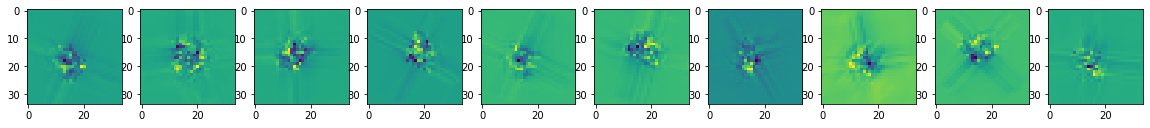

real


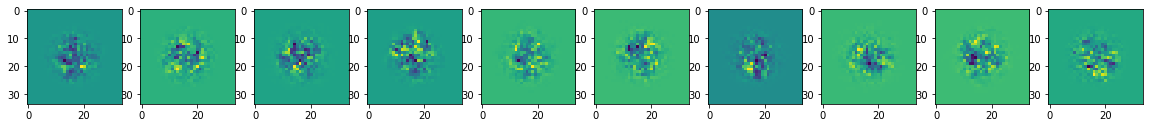

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.022s...
[t-SNE] Computed neighbors for 300 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 9.830153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.117279
[t-SNE] KL divergence after 1000 iterations: 0.562868
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:554: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 2.0587,  8.9442,  4.3940,  0.7163, 11.9649], grad_fn=<DivBackward0>)


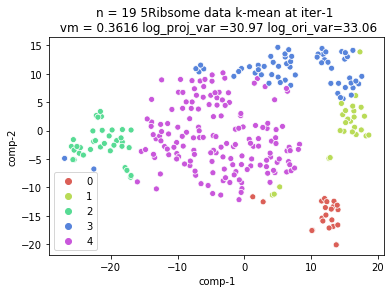

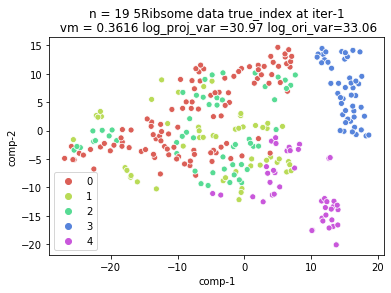

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1244.184070110321 sec
0 batch 2 iteration
generated


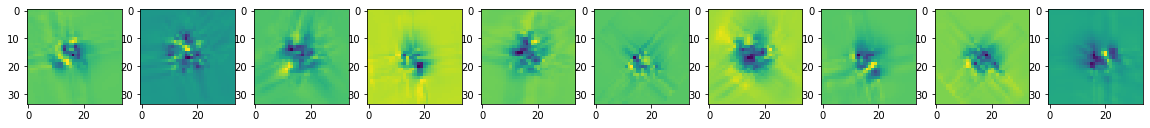

real


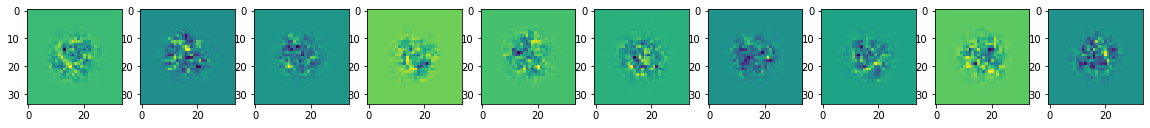

1222.1054615974426 sec
0 batch 3 iteration
generated


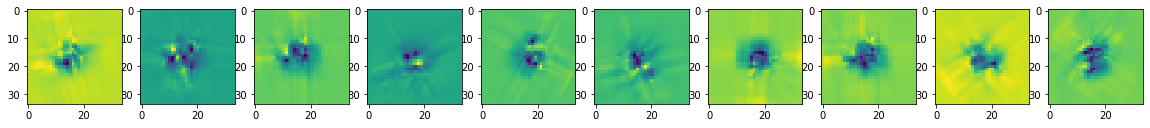

real


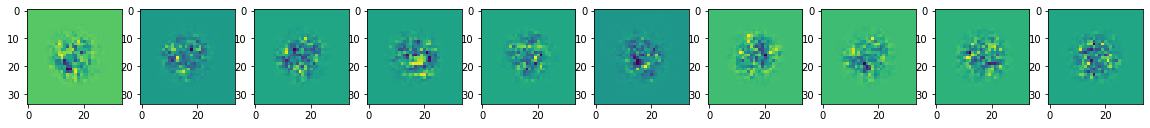

1204.7943527698517 sec
0 batch 4 iteration
generated


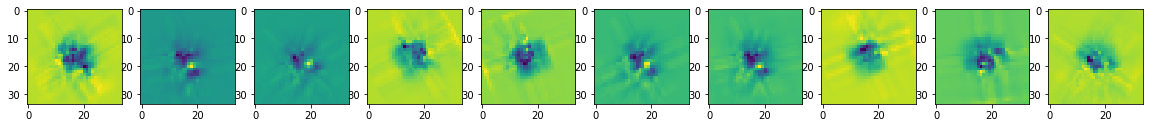

real


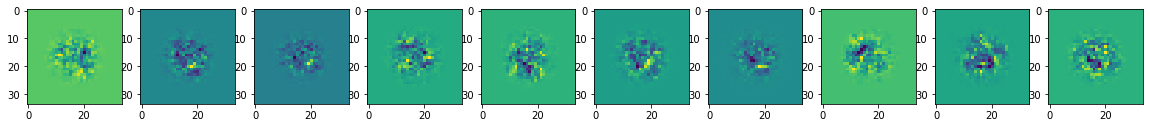

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.811970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.596447
[t-SNE] KL divergence after 1000 iterations: 0.344788
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([10.6156, 31.1294, 17.2951,  4.4643, 40.4364], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


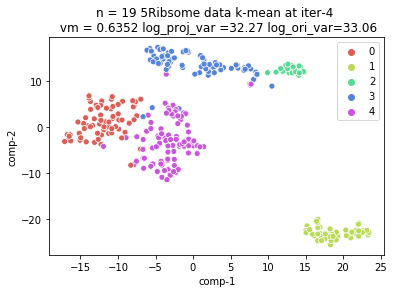

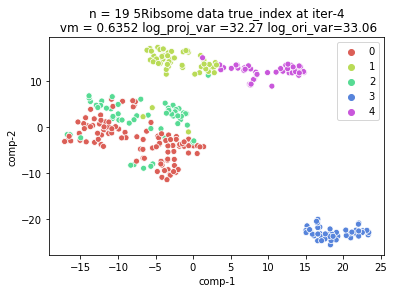

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1245.8321452140808 sec
0 batch 5 iteration
generated


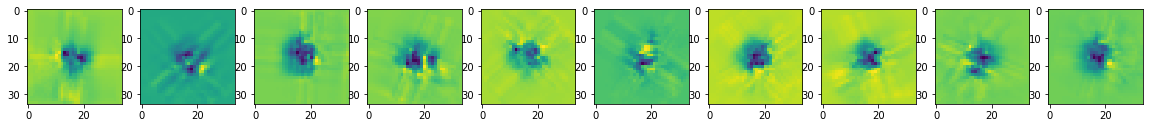

real


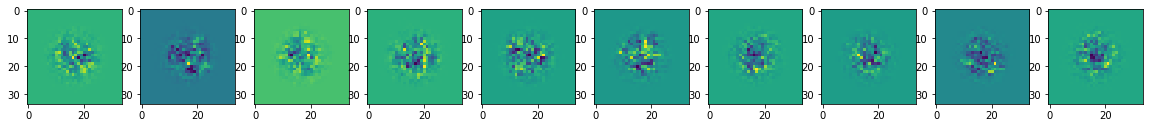

1226.8596036434174 sec
0 batch 6 iteration
generated


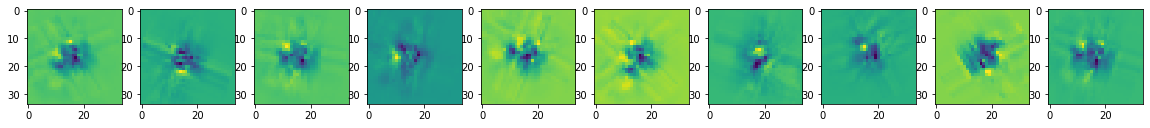

real


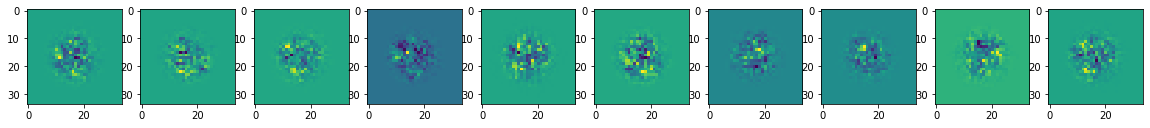

1231.605102300644 sec
0 batch 7 iteration
generated


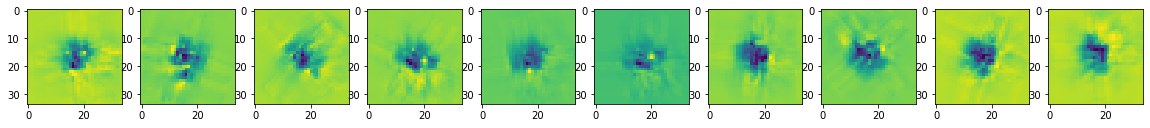

real


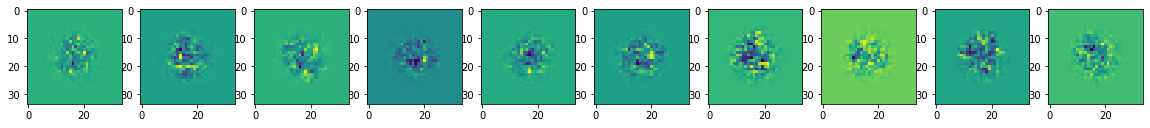

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.391232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.229740
[t-SNE] KL divergence after 1000 iterations: 0.360202
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 9.5246, 27.8636, 15.0745,  4.1200, 36.3632], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


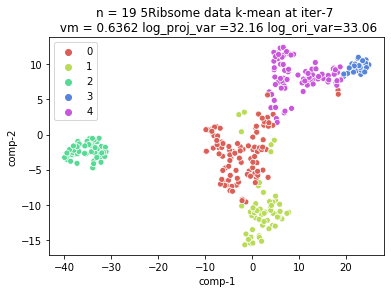

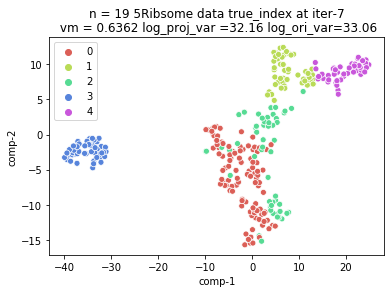

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1240.781766653061 sec
0 batch 8 iteration
generated


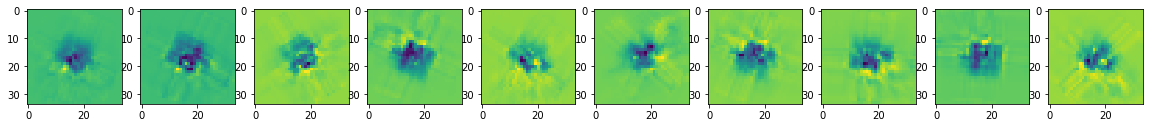

real


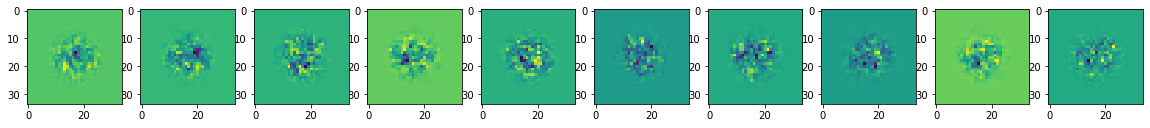

1214.079218864441 sec
0 batch 9 iteration
generated


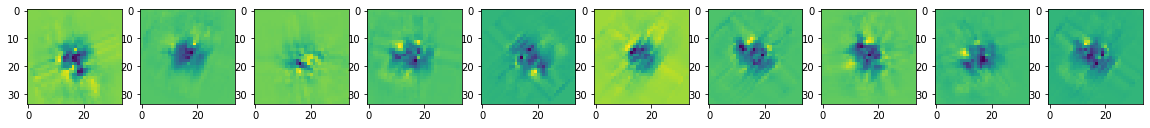

real


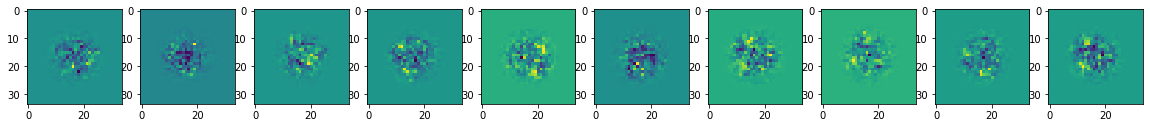

1253.711919784546 sec
0 batch 10 iteration
generated


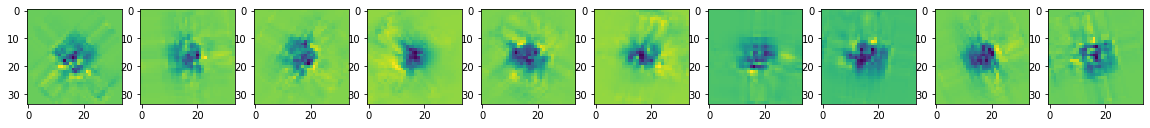

real


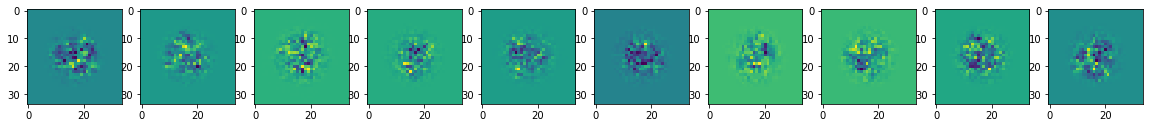

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.581849
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.950275
[t-SNE] KL divergence after 1000 iterations: 0.304066
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.1650, 23.3449, 12.4229,  3.6659, 30.3230], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


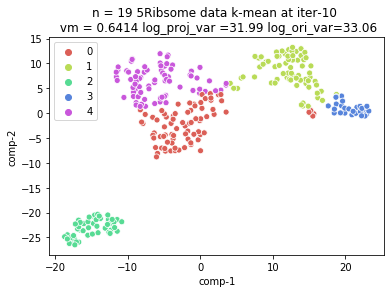

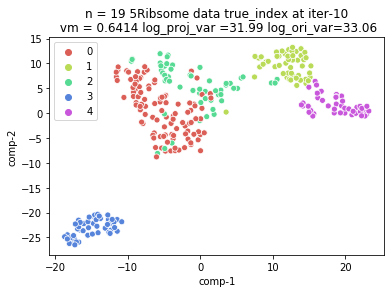

the 0 th iter, ratio = 0.1
output_collection 0-th batch


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.581850
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.132843
[t-SNE] KL divergence after 1000 iterations: 0.322684
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.1650, 23.3449, 12.4229,  3.6659, 30.3230], grad_fn=<DivBackward0>)


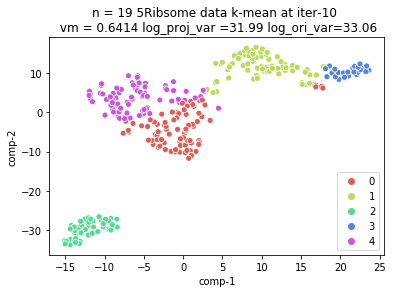

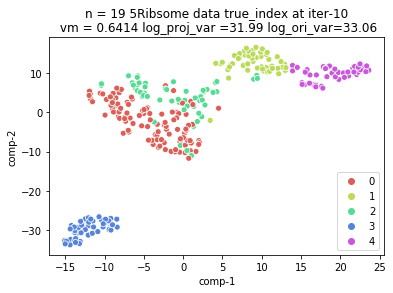

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1190.0372595787048 sec
1 batch 1 iteration
generated


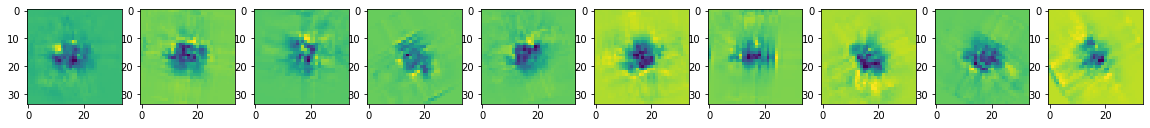

real


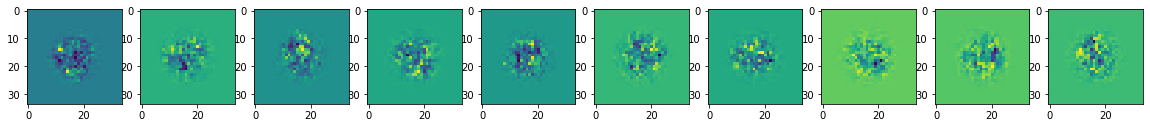

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.709196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.054111
[t-SNE] KL divergence after 1000 iterations: 0.315168
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 8.0287, 21.6333, 12.3106,  3.4641, 28.1348], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


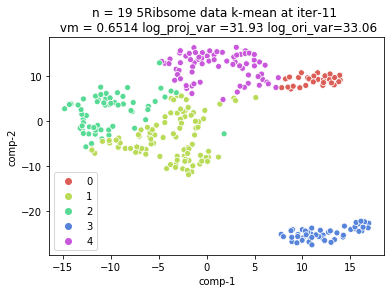

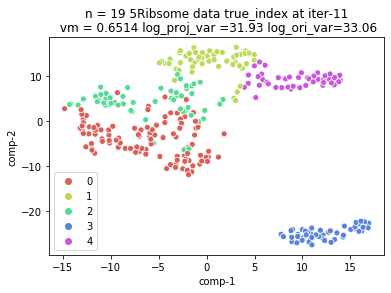

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1218.3355867862701 sec
1 batch 2 iteration
generated


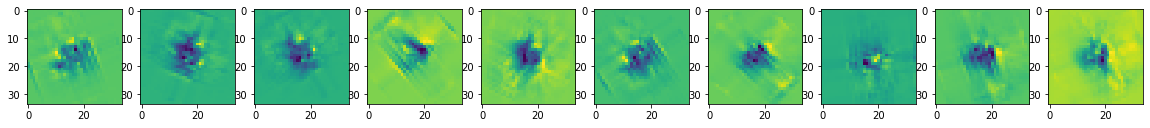

real


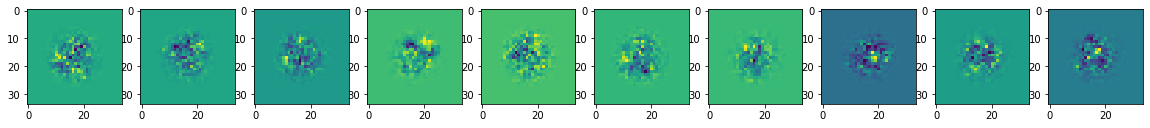

1250.6948347091675 sec
1 batch 3 iteration
generated


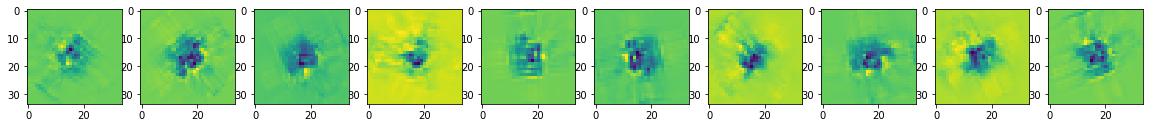

real


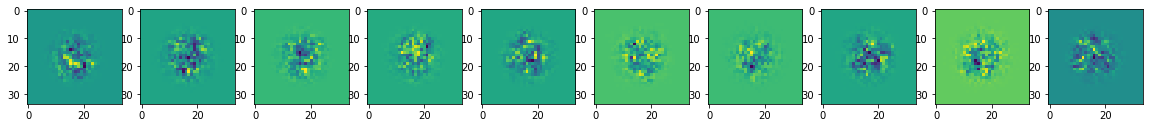

1237.7710132598877 sec
1 batch 4 iteration
generated


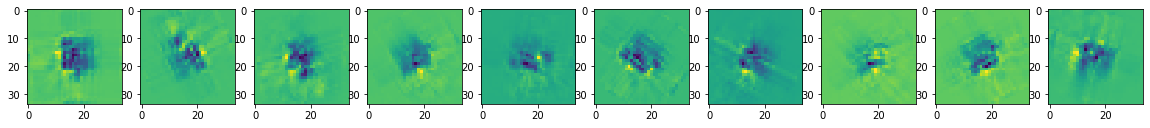

real


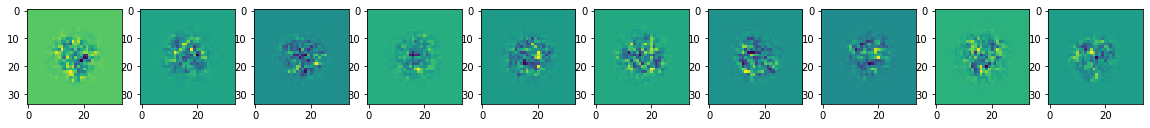

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 5.406968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.055809
[t-SNE] KL divergence after 1000 iterations: 0.314493
self.All_U_kron_shape torch.Size([39304, 6859])
self.PCs.shape torch.Size([6859, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 7.2462, 19.0245, 10.6377,  3.4745, 24.3563], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


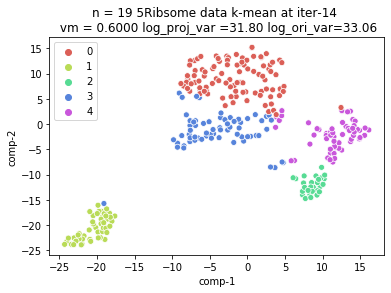

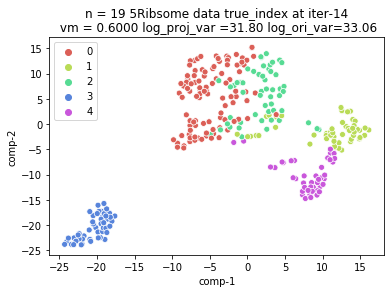

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1186.5031220912933 sec
1 batch 5 iteration
generated


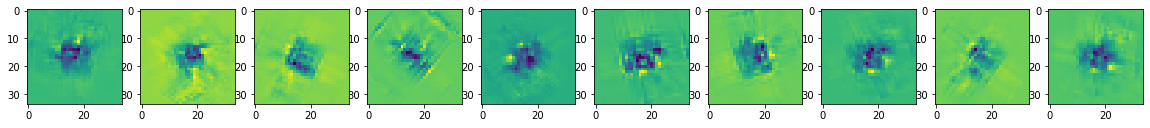

real


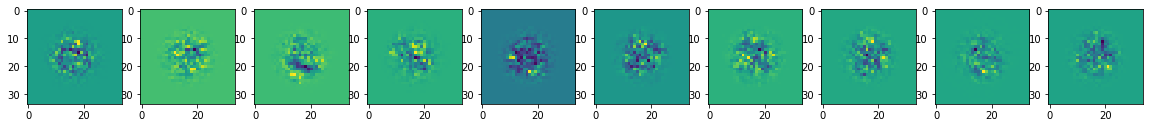

1182.5382277965546 sec
1 batch 6 iteration
generated


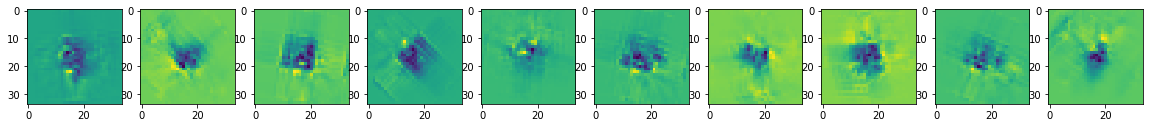

real


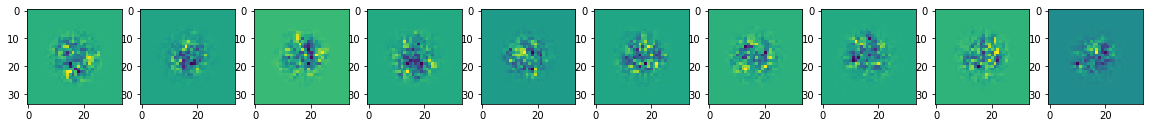

1203.2610704898834 sec
1 batch 7 iteration
generated


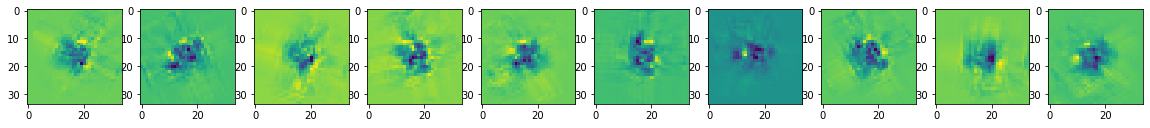

real


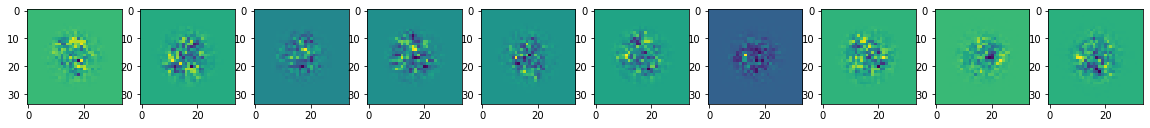

output_collection 0-th batch


KeyboardInterrupt: 

In [5]:
from models import EM_2SDR

n = 19
b = 300
niter = 10
Images = new_projection[:5000]
print(Images.shape)
exp_name = f'20220211_{data_name}_EM_2SDR_n_{n}_senior_mean'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
MP3.fit(0.1, True)

(5000, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:76: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1173.7157199382782 sec
0 batch 1 iteration
generated


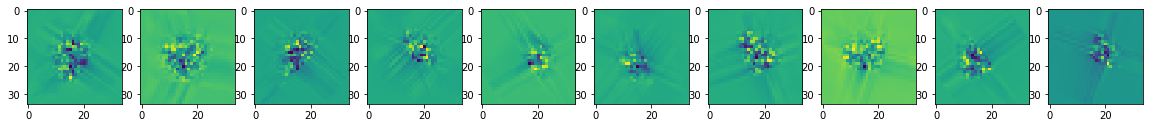

real


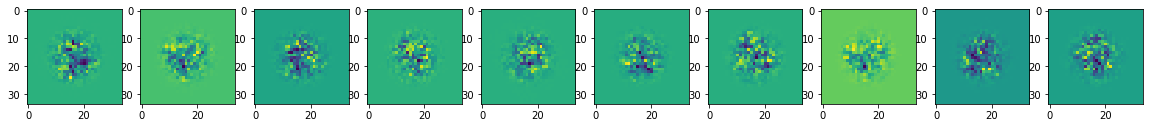

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.026s...
[t-SNE] Computed neighbors for 400 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 7.980864
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.669662
[t-SNE] KL divergence after 1000 iterations: 0.647820
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:554: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/torch/csrc/utils/tensor_new.cpp:201.)
  ms_strucs = torch.tensor(ms_strucs)
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([ 3.5696, 11.0967,  6.6178,  1.4282, 15.4775], grad_fn=<DivBackward0>)


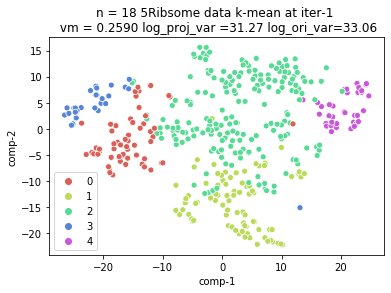

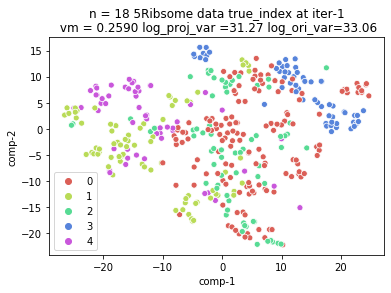

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1151.5577523708344 sec
0 batch 2 iteration
generated


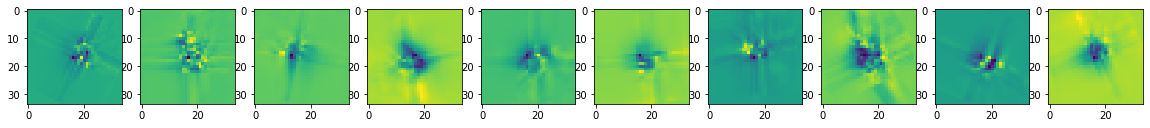

real


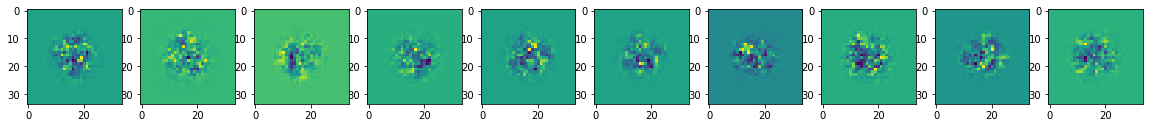

1144.0232439041138 sec
0 batch 3 iteration
generated


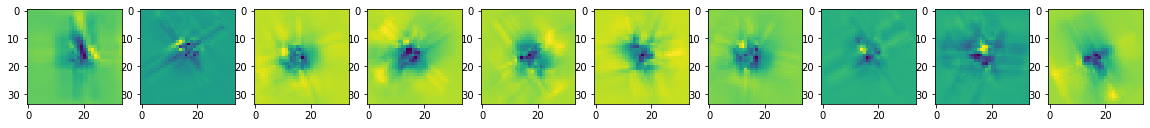

real


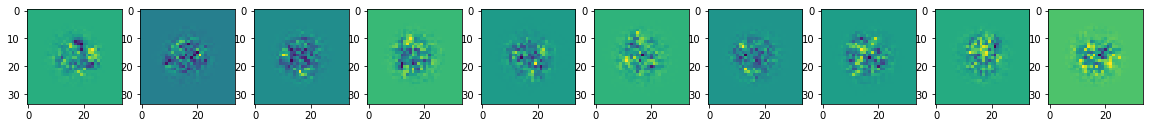

1166.2745342254639 sec
0 batch 4 iteration
generated


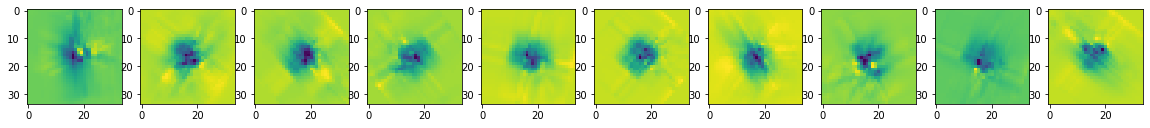

real


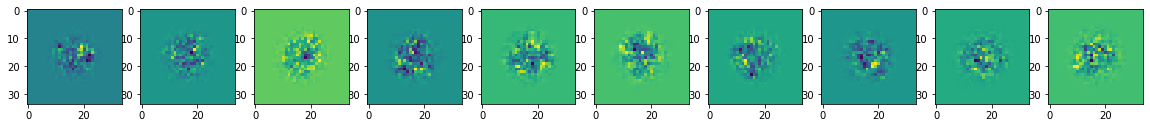

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.921060
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.167740
[t-SNE] KL divergence after 1000 iterations: 0.408463
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([27.0485, 63.9163, 38.6678, 20.8240, 77.9663])
self.projected_var_each tensor([11.3845, 33.9729, 18.8735,  4.6074, 42.2832], grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


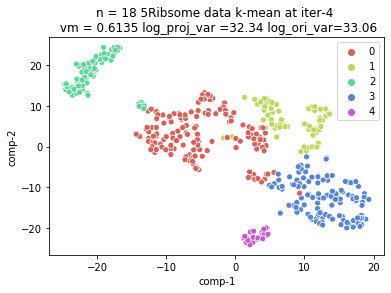

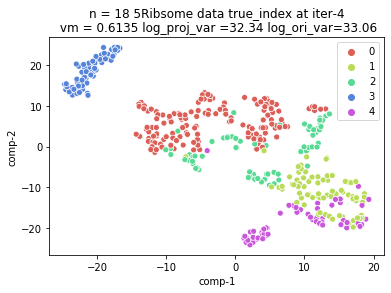

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


In [ ]:
from models import EM_2SDR

n = 18
b = 400
niter = 10
Images = new_projection[:5000]
print(Images.shape)
exp_name = f'20220210_{data_name}_EM_2SDR_n_{n}_pretrained_10'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
MP3.fit(0.1, True)

In [5]:
from models import EM_2SDR

n = 18
b = 400
niter = 10
Images = new_projection[:4800]
print(Images.shape)
exp_name_new = f'20220208_{data_name}_EM_2SDR_n_{n}_new_concate_18'
ProjSize, num_image, n_component , num_iter = 34, Images.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name_new,mean_subtracted_strcut, indexs, batch_size, niter)


(4800, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:76: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]


1346.4012427330017 sec
0 batch 1 iteration
generated


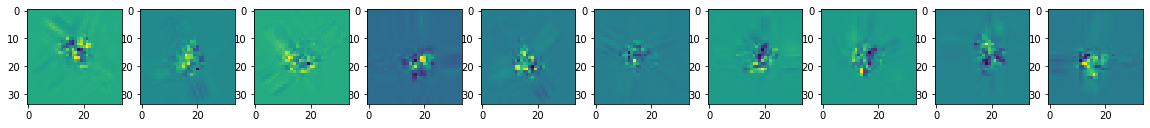

real


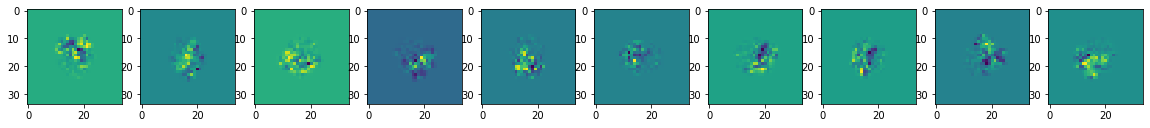

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.035s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 16.107329
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.471981
[t-SNE] KL divergence after 1000 iterations: 0.274868
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([1.6142e-08, 1.1818e-08, 1.5981e-08, 1.6016e-08, 1.0530e-08],
       grad_fn=<DivBackward0>)


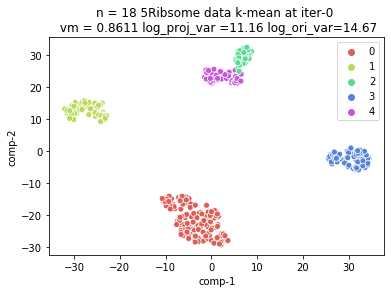

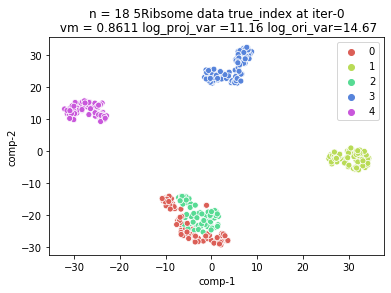

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1319.8540134429932 sec
0 batch 2 iteration
generated


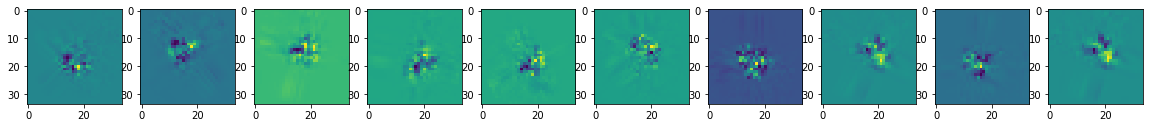

real


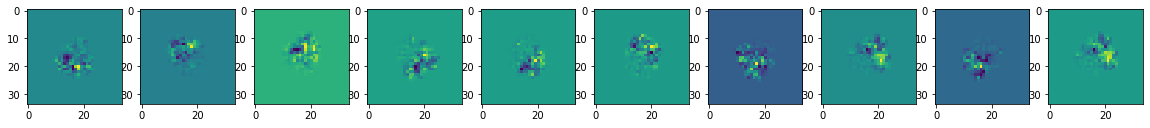

1302.1552367210388 sec
0 batch 3 iteration
generated


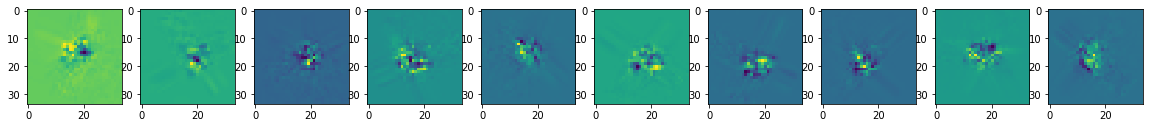

real


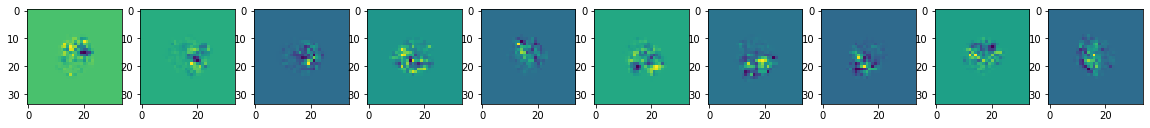

1347.7155756950378 sec
0 batch 4 iteration
generated


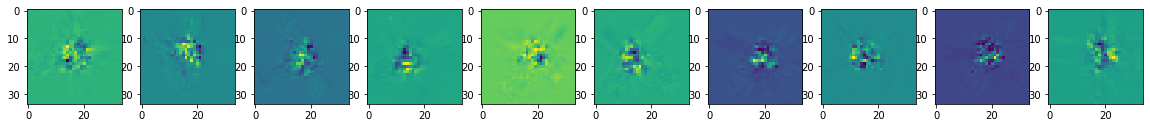

real


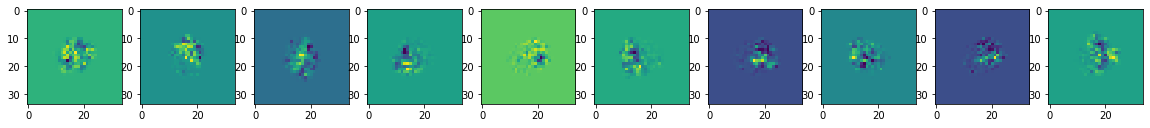

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 16.183171
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.281643
[t-SNE] KL divergence after 1000 iterations: 0.208695
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([9.7193e-09, 7.2700e-09, 9.3127e-09, 9.2602e-09, 5.8001e-09],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


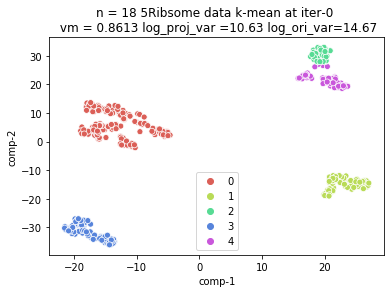

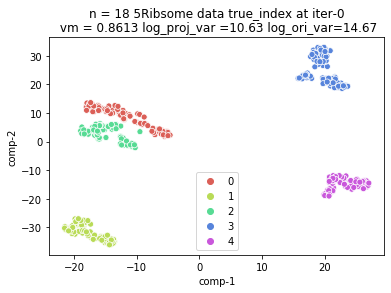

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [8]:
import torch


"""
U1 = torch.load(f'./snap_shot/{exp_name}_3th_10_U1.pt')
U2 = torch.load(f'./snap_shot/{exp_name}_3th_10_U2.pt')
U3 = torch.load(f'./snap_shot/{exp_name}_3th_10_U3.pt')
"""

U1 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U2.pt')
U3 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()
MP3.fit(start_ratio = 0.1, estimate = True)

(15000, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:76: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1663.5799913406372 sec
0 batch 1 iteration
generated


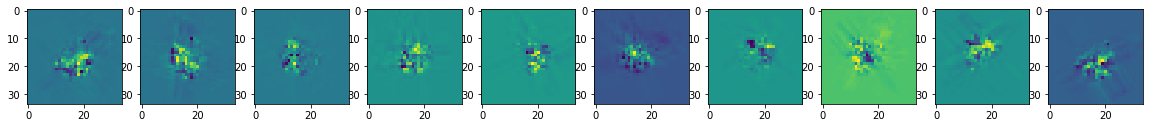

real


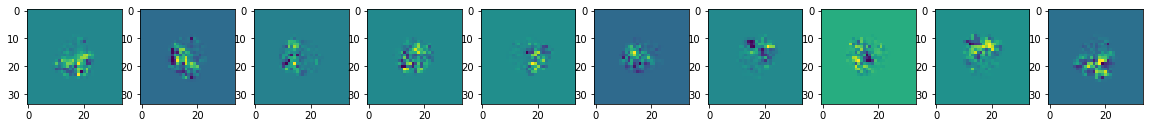

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.032s...
[t-SNE] Computed neighbors for 250 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 13.421648
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.618912
[t-SNE] KL divergence after 1000 iterations: 0.152427
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([4.1631e-08, 3.0798e-08, 3.9297e-08, 4.1293e-08, 2.7054e-08],
       grad_fn=<DivBackward0>)


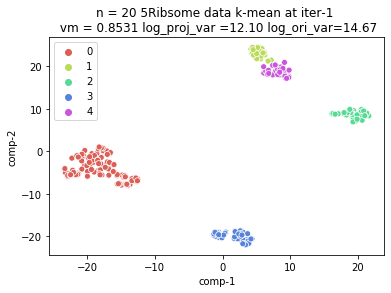

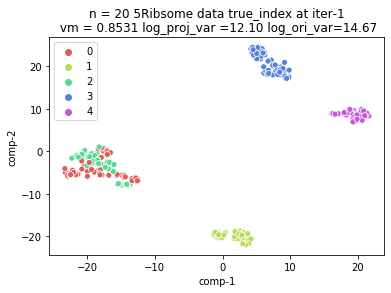

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1536.3835821151733 sec
0 batch 2 iteration
generated


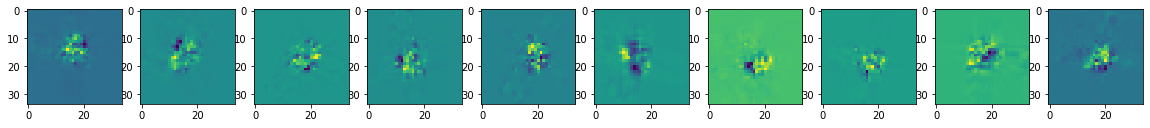

real


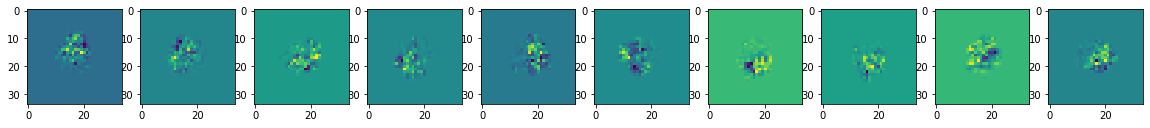

1587.1137864589691 sec
0 batch 3 iteration
generated


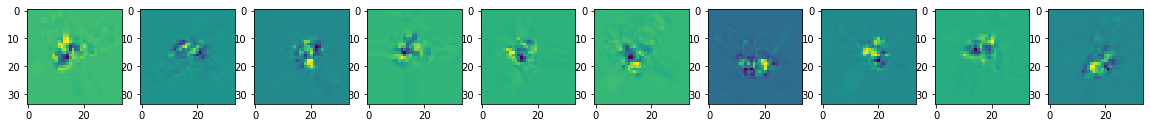

real


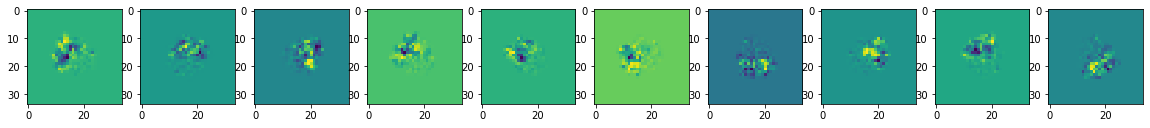

1531.4820187091827 sec
0 batch 4 iteration
generated


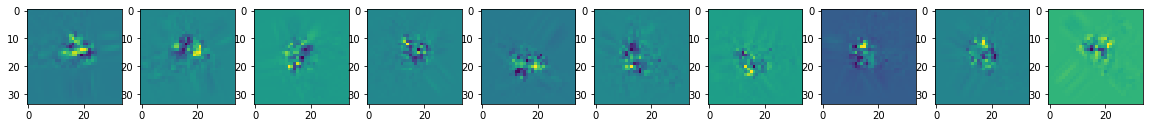

real


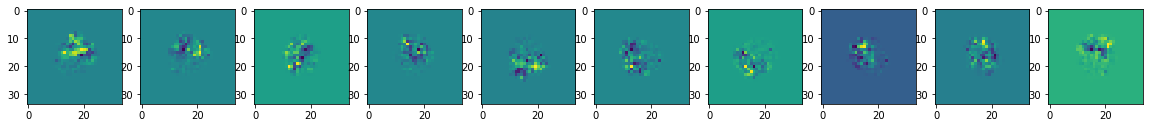

output_collection 0-th batch
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.001s...
[t-SNE] Computed neighbors for 250 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 9.724091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.288059
[t-SNE] KL divergence after 1000 iterations: 0.148116
self.All_U_kron_shape torch.Size([39304, 8000])
self.PCs.shape torch.Size([8000, 5])
self.ori_var_each tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([2.4803e-08, 1.7976e-08, 2.3074e-08, 2.0796e-08, 1.1859e-08],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:558: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


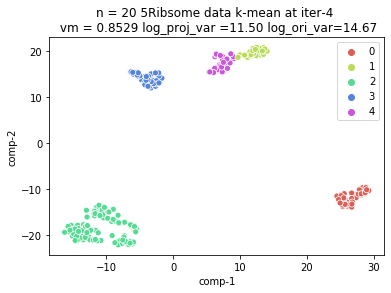

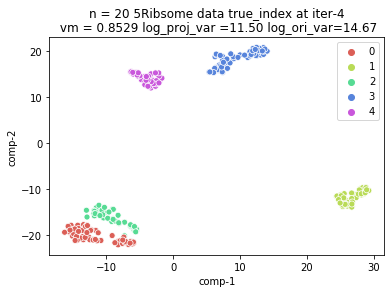

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1557.0761635303497 sec
0 batch 5 iteration
generated


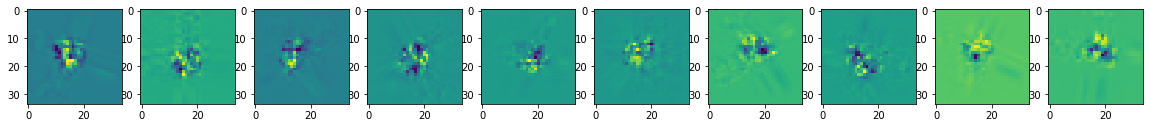

real


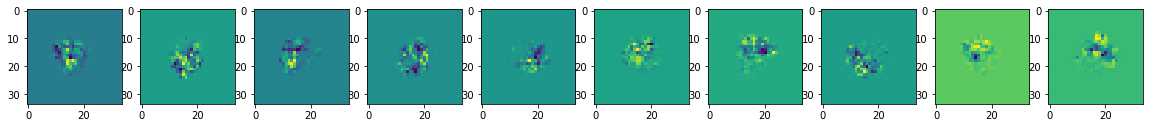

1516.7077460289001 sec
0 batch 6 iteration
generated


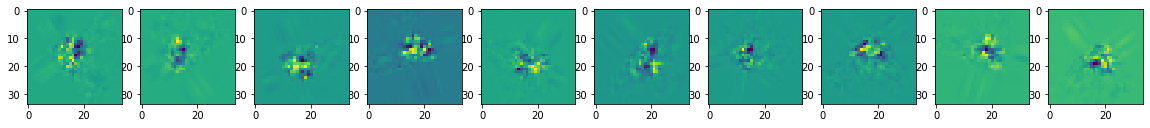

real


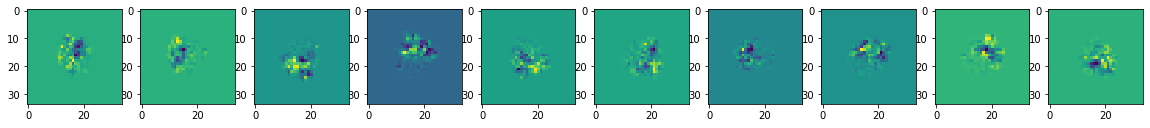

In [ ]:
from models import EM_2SDR
import torch
n = 20
b = 250
niter = 10
Images = new_projection
print(Images.shape)
exp_name = f'20220210_{data_name}_EM_2SDR_n_{n}_check_trained'
ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)

U1 = torch.load('./snap_shot/20220208_70s_ribsome_true_mean_random_angles_EM_2SDR_n_18_new_concate_18_0th_4_U1.pt')
U2 = torch.load('./snap_shot/20220208_70s_ribsome_true_mean_random_angles_EM_2SDR_n_18_new_concate_18_0th_4_U2.pt')
U3 = torch.load('./snap_shot/20220208_70s_ribsome_true_mean_random_angles_EM_2SDR_n_18_new_concate_18_0th_4_U3.pt')
MP3.U1.data[:, :18] = U1.detach()
MP3.U2.data[:, :18] = U2.detach()
MP3.U3.data[:, :18] = U3.detach()
MP3.fit(0.1, estimate = True)
#MP3.Draw_Kmean_tsne('finish', 1)

In [10]:
MP3.Draw_Kmean_tsne('finish-2', 12)

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

(15000, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.004s...
[t-SNE] Computed neighbors for 4800 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 2.728938
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.961380
[t-SNE] KL divergence after 1000 iterations: 0.681715
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([3.6101e-08, 2.5206e-08, 3.3750e-08, 3.7491e-08, 2.3491e-08],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:551: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


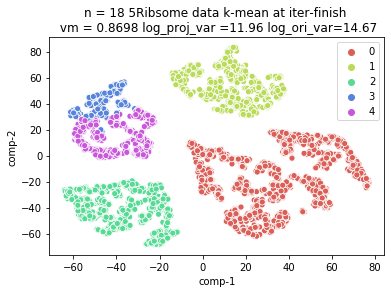

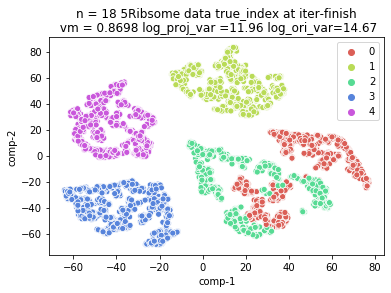

In [9]:
from models import EM_2SDR
import torch
n = 18
b = 400
niter = 10
Images = new_projection
print(Images.shape)
exp_name = f'20220209_{data_name}_EM_2SDR_n_{n}_check_old_snap+shot'
ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)

U1 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U2.pt')
U3 = torch.load('./snap_shot/1217_n_18_MPCA_0th_U3.pt')
MP3.U1.data[:, :n] = U1.detach()
MP3.U2.data[:, :n] = U2.detach()
MP3.U3.data[:, :n] = U3.detach()
MP3.Draw_Kmean_tsne('finish', 12)


In [10]:
#Start checking where is the different place
#print(indexs[:10])
with open('./snap_shot/20220209_70s_ribsome_true_mean_random_angles_EM_2SDR_n_18_check_old_snap+shot_all_mu.pkl', 'rb') as  f:
    new_mu = pickle.load(f)
with open('./snap_shot/1217_n_18_MPCA_all_mu.pkl', 'rb') as  f:
    old_mu = pickle.load(f)

print(new_mu[0][0])
print(old_mu[0][0])
print('output mu is different')

[0.02222990244626999]
[1.5972199440002441]
output mu is different


In [11]:
Coef = np.array(old_mu)

Coef = Coef.reshape(4800, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4800 samples in 0.002s...
[t-SNE] Computed neighbors for 4800 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 5.558480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.874969
[t-SNE] KL divergence after 1000 iterations: 0.867968
[4 0 3 3 3 1 3 2 4 0]


[Text(0.5, 1.0, '5Ribsome data true label')]

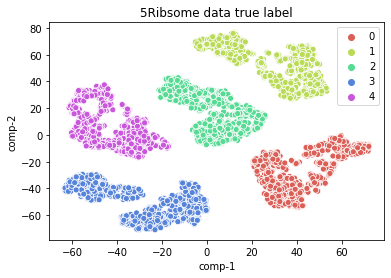

In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)[:4800]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


0.9981437776465099


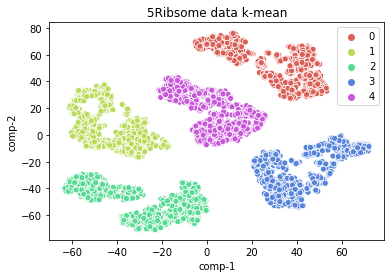

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(z)
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(indexs, kmeans.labels_))

In [20]:
with open(f'./data/{data_name}/old_method_images.pkl', 'rb') as f:
    old_projection = pickle.load( f)


In [46]:
print(old_projection.shape)
print(new_projection.shape)
print(np.mean(old_projection))
print(np.mean(new_projection))
print('images are differnet, but the first 5000 images are all the same')
#Images are different
"""
old angles:
[[3.4465488  2.20993514 3.785354  ]
 [3.42186639 1.30909333 4.05621503]
 [2.74804769 2.75557857 6.05180214]
 [2.40801274 2.44643037 3.3214601 ]
 [3.56731984 2.86009361 0.44610645]
 [0.547172   0.06247485 5.22885263]
 [4.8868244  2.68833754 6.14572319]
 [5.01871578 1.42597123 4.90172323]
 [0.74276339 1.97735596 0.90025864]
 [5.9325208  1.61251131 2.60407698]
"""
print(angles2[:10])
print('angles are the same')
print(Orientation_Vectors[0])
print('orientation vector is the same too')
"""
[[ 0.64196246 -0.48173293 -0.59650447  0.          0.          0.
  -0.63530991  0.10135335 -0.76557744  0.42926159  0.87043718 -0.24098466]
]
"""

"""
pg.ray_dir[:5]
[[-0.59650447 -0.48173293  0.64196246]
 [ 0.25872594 -0.76535396  0.58931673]
 [-0.92641711 -0.08634023 -0.36646515]
 [-0.76794977 -0.11458671  0.63017699]
 [-0.96064009  0.11985684 -0.25060917]]
"""
print('pg.ray_dir[:5]\n',pg.ray_dir[:5], pg.ray_dir.shape)
print('orientation matrix is the same, since orientation matrix form pg.ray_dir')

(15000, 34, 34)
(15000, 34, 34)
0.002295563876019423
0.002539668616371396
images are differnet, but the first 5000 images are all the same
[[3.4465488  2.20993514 3.785354  ]
 [3.42186639 1.30909333 4.05621503]
 [2.74804769 2.75557857 6.05180214]
 [2.40801274 2.44643037 3.3214601 ]
 [3.56731984 2.86009361 0.44610645]
 [0.547172   0.06247485 5.22885263]
 [4.8868244  2.68833754 6.14572319]
 [5.01871578 1.42597123 4.90172323]
 [0.74276339 1.97735596 0.90025864]
 [5.9325208  1.61251131 2.60407698]]
angles are the same
[ 0.64196246 -0.48173293 -0.59650447  0.          0.          0.
 -0.63530991  0.10135335 -0.76557744  0.42926159  0.87043718 -0.24098466]
orientation vector is the same too
pg.ray_dir[:5]
 [[-0.59650447 -0.48173293  0.64196246]
 [ 0.25872594 -0.76535396  0.58931673]
 [-0.92641711 -0.08634023 -0.36646515]
 [-0.76794977 -0.11458671  0.63017699]
 [-0.96064009  0.11985684 -0.25060917]] (15000, 3)
orientation matrix is the same, since orientation matrix form pg.ray_dir


In [38]:
print(np.mean(new_projection[0]))
print(np.mean(old_projection[0]))
for i in range(15000):
    if np.mean(new_projection[i] - old_projection[i])  != 0 :
        print(i)
print('the first 5000 images are all the same')

-0.2971930243254267
-0.2971930243254267
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191


7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111


10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
1069

12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
1288

In [ ]:
#pg = ParallelVectorGeometry.from_astra(Proj_geom)


In [ ]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))



In [ ]:
"""
Get original mean subtracted structs
"""
with open('./data/3DVA_subtracted_vols34_0205.pkl', 'rb') as  f:
    mean_sbtracted_structs = pickle.load(f)
print(len(mean_sbtracted_structs))
print(type(mean_sbtracted_structs[0]))
for i in range(5):
    mean_sbtracted_structs[i] = mean_sbtracted_structs[i].tolist()
mean_sbtracted_structs = np.array(mean_sbtracted_structs)
print(mean_sbtracted_structs.shape)

In [ ]:
"""
U1 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U1.pt')
U2 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U2.pt')
U3 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U3.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()
"""

#MP3.fit(start_ratio = 0.1)


In [ ]:
lr = torch.mean(torch.abs(MP3.U1)) * 0.1
print(torch.mean(torch.abs(MP3.U1)))

In [ ]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set
"""
U1 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U3 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()

"""




#MP3.fit(start_ratio = 0.1)



In [ ]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [ ]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


In [ ]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


In [ ]:
print(Coef.shape)
Coef = Coef.reshape(9200, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

In [ ]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)


In [ ]:
print(z.shape)
#print(len(indexs))

indexs = Index_3DVA[:9200]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [ ]:

print(v_measure_score(indexs, kmeans.labels_))